# Доверительные интервалы для оценки среднего

In [8]:
import sklearn
from sklearn import datasets, linear_model, metrics

import numpy as np

In [3]:
from matplotlib import pyplot as plt
from matplotlib import pylab

Populating the interactive namespace from numpy and matplotlib


## Генерация данных

In [4]:
blobs = datasets.make_blobs(300, centers = 2, cluster_std = 6, random_state=1)

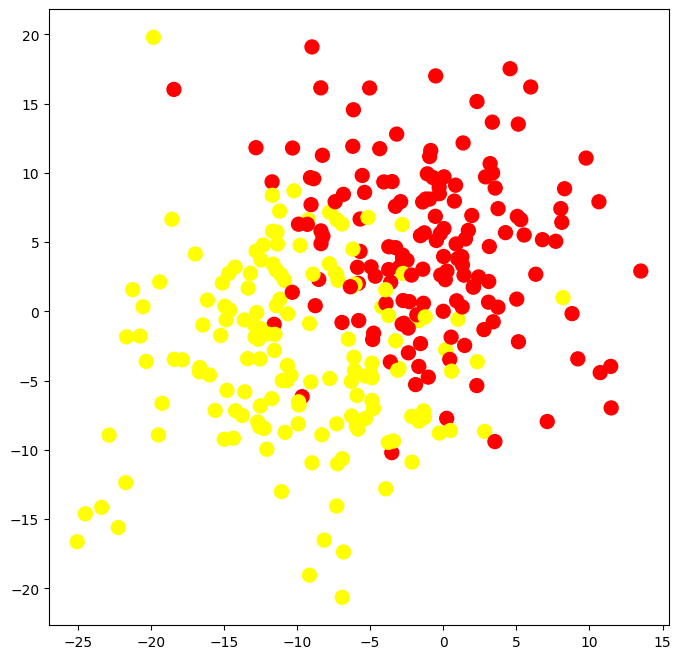

In [7]:
pylab.figure(figsize=(8, 8))
pylab.scatter(list(map(lambda x: x[0], blobs[0])), list(map(lambda x: x[1], blobs[0])), c = blobs[1], cmap = 'autumn',
             s=100)

## Сравнение линейных моделей

### Точечная оценка

In [9]:
train_data, test_data, train_labels, test_labels = sklearn.model_selection.train_test_split(
    blobs[0], blobs[1],
    test_size = 15,
    random_state = 1
)

In [10]:
ridge_model = linear_model.RidgeClassifier()
ridge_model.fit(train_data, train_labels)
metrics.roc_auc_score(test_labels, ridge_model.predict(test_data))

0.8888888888888888

In [11]:
sgd_model = linear_model.SGDClassifier(random_state = 0)
sgd_model.fit(train_data, train_labels)
metrics.roc_auc_score(test_labels, sgd_model.predict(test_data))

0.7777777777777778

### Оценка среднего

In [12]:
sgd_auc_scores = sklearn.model_selection.cross_val_score(
    linear_model.SGDClassifier(),
    blobs[0], blobs[1], scoring = 'roc_auc',
    cv = 20
)

In [13]:
ridge_auc_scores = sklearn.model_selection.cross_val_score(
    linear_model.RidgeClassifier(),
    blobs[0], blobs[1], scoring = 'roc_auc',
    cv = 20
)

### Точечная оценка среднего

In [16]:
print (f"sgd model auc: mean {sgd_auc_scores.mean():3f}, std {sgd_auc_scores.std(ddof=1):3f}")
print (f"ridge model auc: mean {ridge_auc_scores.mean():3f}, std {ridge_auc_scores.std(ddof=1):3f}")

sgd model auc: mean 0.865179, std 0.206262
ridge model auc: mean 0.936607, std 0.071305


### Интервальная оценка среднего 

In [17]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [18]:
sgd_mean = sgd_auc_scores.mean()
ridge_mean = ridge_auc_scores.mean()

#### z-интервал

Допустим, нам откуда-то известно, что дисперсия auc_scores $\sigma^2=0.25$. Построим доверительные интервалы для средних вида $$\bar{X}_n \pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

In [23]:
print ("sgd model mean auc 95%% confidence interval", _zconfint_generic(sgd_mean,
                                                                  np.sqrt(0.25/len(sgd_auc_scores)),
                                                                  0.05, 'two-sided'))

print ("ridge model mean auc 95%% confidence interval", _zconfint_generic(ridge_mean,
                                                                    np.sqrt(0.25/len(sgd_auc_scores)),
                                                                    0.05, 'two-sided'))

sgd model mean auc 95%% confidence interval (0.6460479362844262, 1.084309206572717)
ridge model mean auc 95%% confidence interval (0.7174765077129974, 1.155737778001288)


#### t-интервал

Вместо гипотетической теоретической дисперсии $\sigma^2$, которую мы на самом деле в данном случае не знаем, используем выборочные дисперсии, и построим доверительные интервалы вида $$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [20]:
type(sgd_auc_scores)

numpy.ndarray

In [21]:
sgd_mean_std = sgd_auc_scores.std(ddof=1)/np.sqrt(len(sgd_auc_scores))
ridge_mean_std = ridge_auc_scores.std(ddof=1)/np.sqrt(len(ridge_auc_scores))

In [22]:
print ("sgd model mean auc 95%% confidence interval", _tconfint_generic(sgd_mean, sgd_mean_std,
                                                                       len(sgd_auc_scores) - 1,
                                                                       0.05, 'two-sided'))

print ("ridge model mean auc 95%% confidence interval", _tconfint_generic(ridge_mean, ridge_mean_std,
                                                                         len(sgd_auc_scores) - 1,
                                                                         0.05, 'two-sided'))

sgd model mean auc 95%% confidence interval (0.7686448401634556, 0.9617123026936876)
ridge model mean auc 95%% confidence interval (0.903235324375978, 0.9699789613383075)
